# Wrangling and Analyzing Data of the twitter account "WeRateDogs"

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson and has, as of October 2022, 9.3 million followers. <br>

In this project data from tweets posted between 15-11-2015 and 01-08-2017 are gathered, warngled and analyzed. Which post was the most popular on WeRateDogs during this time?? This, and other interesting insights on the WeRateDogs twitter account are obtained in this project.


### RESEARCH QUESTIONS
- What is the most common rating and how common are ratings above 10/10? <br>
- Are dog rating and likes correlated? <br>
- What are the 10 most common dog breeds on WeRateDogs? <br>
- What are the 10 most popular tweets on WeRateDogs? <br>

## Data Gathering

Three dataframes with info on tweets of the WeRateDogs twitter account are generated using three different methods:
1. df_tweet: containing basic tweet info, inluding tweet text, dog rating, dog name and dog stage <br>
    _Method: Direct download of a .csv file (twitter_archive_enhanced.csv)_
2. df_image: containing image url and predicted dog breed based on the image <br>
   _Methods: Download of a .tsv file using the Request library (image_predictions.tsv)_
3. df_count: containing like count, reply count, retweet count and quote count <br>
    _Method: Query of additional tweet data via the Twitter API using Tweepy library_

1. Direct download of WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy

% matplotlib inline

In [2]:
# Load twitter archive file 
df_tweet = pd.read_csv('twitter-archive-enhanced.csv')

2. Download of tweet image prediction using the Request library (image_predictions.tsv)

In [3]:
import requests
import os

# Create the request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Access content and write to file
with open(url.split('/')[-1], mode = 'wb') as file: 
    file.write(response.content)

# Load image predictions file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### Sources used to query data via the Twitter API:

https://docs.tweepy.org/en/v4.0.1/client.html 

https://stackoverflow.com/questions/70371657/problem-with-getting-tweet-fields-from-twitter-api-2-0-using-tweepy

https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9

https://stackoverflow.com/questions/3494906/how-do-i-merge-a-list-of-dicts-into-a-single-dict

https://stackoverflow.com/questions/59687201/how-to-convert-a-txt-file-with-dictionary-format-to-dataframe-in-python

In [ ]:
# Upgrade tweepy to get excess to Client
import sys
!{sys.executable} -m pip install tweepy --upgrade

In [ ]:
# Access Twitter API with Client
bearer_token = '' # add bearer roken here
client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df_image['tweet_id']

# Create empty list
df_list = []
except_list = []

# Run through tweet ids and get public metrics information
for id in tweet_ids:
    try:
        data = client.get_tweet(id = id, tweet_fields = ['public_metrics'])
        tweet = data.data
        metrics = tweet.public_metrics
        # Create temporary list
        temp_list = []
        temp_list.append({'tweet_id': id})
        for i in metrics:
            temp_list.append({i: metrics[i]})
        # Merge list of dicts into single dict 
        result = {}
        for d in temp_list:
            result.update(d)
        # Append single dict to list
        df_list.append(result)
    except:
        e = sys.exc_info()[0]
        print( "<p>Error: %s</p>" % e )
        except_list.append({'tweet_id': id})

In [ ]:
# Print content of first list item
print(df_list[0])
# Print number of list items
print('Number of tweets: ', len(df_list))
# Print number of errors
print('Number of errors: ', len(except_list))

In [ ]:
# List to txt file
with open(r'/home/workspace/tweet_data.txt', 'w') as file:
    for item in df_list:
        # write each item on a new line
        file.write("%s\n" % item)
    print('Done')

In [4]:
# Text file to dataframe
import ast
df_count = pd.DataFrame(pd.read_csv('tweet_data.txt',sep='|',header=None).iloc[:,0]
         .apply(ast.literal_eval).tolist())
df_count.head()

,like_count,quote_count,reply_count,retweet_count,tweet_id
0,2277,30,19,418,666020888022790149
1,112,0,0,39,666029285002620928
2,100,0,1,36,666033412701032449
3,246,2,1,114,666044226329800704
4,88,0,9,36,666049248165822465


## Assessing Data

#### TWEET table

In [5]:
# Explore dataset
df_tweet.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
243,846139713627017216,NaN,NaN,2017-03-26 23:20:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,NaN,NaN,NaN,https://twitter.com/csncapitals/status/8460884...,13,10,None,None,None,None,None
1708,680798457301471234,NaN,NaN,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,None,None,None,None
978,749996283729883136,NaN,NaN,2016-07-04 16:00:22 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Bo. He emanates happiness. 12/10 I cou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749996283...,12,10,Bo,None,None,None,None
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
1959,673576835670777856,NaN,NaN,2015-12-06 18:56:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sun burnt dog here. Quite large. Wants to prom...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673576835...,7,10,None,None,None,None,None
1893,674752233200820224,NaN,NaN,2015-12-10 00:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674752233...,12,10,None,None,None,None,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667793409...,8,10,None,None,None,None,None


In [6]:
# Check for missing values and incorrect datatypes 
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# Check for duplicated tweet ids 
df_tweet[df_tweet.tweet_id.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [8]:
# Check for duplicated replies 
df_tweet[df_tweet.in_reply_to_status_id.duplicated(keep=False).notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# Check number of detected dog stages
df_tweet[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


In [10]:
# Explore rating values
df_tweet.sort_values(by=['rating_numerator'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None


In [11]:
df_tweet.sort_values(by=['rating_denominator'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None,None,None,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,None,None,pupper,None
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,None,None,None,None
1563,688179443353796608,NaN,NaN,2016-01-16 02:02:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lizzie. She's about to fist bump the l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688179443...,10,10,Lizzie,None,None,pupper,None
1570,687732144991551489,NaN,NaN,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ember. That's the q-tip she owes money...,NaN,NaN,NaN,https://vine.co/v/iOuMphL5DBY,11,10,Ember,None,None,None,None


In [12]:
# Find names without capital letter
df_tweet[df_tweet.name.str.islower().fillna(False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [13]:
# Find missing names
df_tweet[df_tweet.name.str.contains('None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [14]:
# Find names with only one character
df_tweet[df_tweet["name"].str.len()==1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None


#### IMAGE table

In [15]:
# Explore dataset
df_image.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw_puzzle,0.970810,False,prayer_rug,0.011048,False,quill,0.008432,False
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True
1985,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,0.140796,True,bull_mastiff,0.044681,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
332,672139350159835138,https://pbs.twimg.com/media/CVPrLE2WwAELCxD.jpg,1,Rottweiler,0.290992,True,American_black_bear,0.238120,False,chimpanzee,0.115541,False
406,673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,golden_retriever,0.936333,True,cocker_spaniel,0.024211,True,Labrador_retriever,0.009435,True


In [16]:
# Check for missing values and incorrect datatypes
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Check for duplicated rows
df_image[df_image.duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [18]:
# Check for images with 3 false 'dog breed' predictions
df_image[(df_image['p1_dog']==False) & (df_image['p2_dog']==False) & (df_image['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [19]:
# Find images with false 'dog breed' predictions for the first two predictions 
false_dog = df_image[(df_image['p1_dog']==False) & (df_image['p2_dog']==False) & (df_image['p3_dog']==True)]

In [20]:
# Collect those images with two false 'dog breed' predictions and save to folder for further exploration
urls = list(false_dog['jpg_url'])

folder_name = 'Images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for url in urls:
    url = url
    img_data = requests.get(url).content
    tweet_id = df_image[(df_image['jpg_url']==url)].tweet_id.values[0]
    with open (os.path.join(folder_name) + '/' + str(tweet_id) + '.jpeg', 'wb') as handler:
        handler.write(img_data)

In [21]:
# Zip images for download
!tar -czf archive.tar.gz Images

#### COUNT table

In [22]:
# Explore dataset
df_count.head()

,like_count,quote_count,reply_count,retweet_count,tweet_id
0,2277,30,19,418,666020888022790149
1,112,0,0,39,666029285002620928
2,100,0,1,36,666033412701032449
3,246,2,1,114,666044226329800704
4,88,0,9,36,666049248165822465


In [23]:
# Check for missing values and incorrect datatypes
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 5 columns):
like_count       2056 non-null int64
quote_count      2056 non-null int64
reply_count      2056 non-null int64
retweet_count    2056 non-null int64
tweet_id         2056 non-null int64
dtypes: int64(5)
memory usage: 80.4 KB


In [24]:
# Check for duplicated rows
df_count[df_count.duplicated(keep=False)]

,like_count,quote_count,reply_count,retweet_count,tweet_id


### Quality issues

##### `tweet` table

- Non-original ratings (retweets and replies)
- Erroneous datatypes:
    * timestamp from object to datetime
- Incorrect names in column 'name' of df_tweet:
    * 745 rows with 'None' --> NaN
    * 109 rows with incorrectly identified names as 'the', 'a', 'an', 'such', 'quite' and more. 
    * "O" instead of "O'Malley" 
- Incorrect ratings 
    - Incorrectly detected ratings (e.g. values as 24/7, 7/11 and 50/50 that have been mistaken for a rating value)
    - Incorrectly detected numerator values (e.g. 9.75 is read as 75)
    - Ratings with a denominator above 10
- Multiple dog breed predictions per image 
    - Images with >1 true dog breed prediction
- Tweet text includes URL
- Rows with duplicated and non-twitter urls in expanded_urls column

##### `image` table

- No detected dog breed for some images
    - 'False' image prediction for the first, second and third prediction. 
    
- Non-dog images 
    - Non-dog images with a false 'dog breed' prediction in the first and second attempt, but a true 'dog breed' prediction in the final attempt. These include tweet id's: **668297328638447616, 673345638550134785, 679854723806179328, 671163268581498880, 667524857454854144, 671141549288370177, 678740035362037760, 670452855871037440**

- Missing image predictions for some tweets (Image table has less data than the tweet table)

- Inconsistent use of capital letters in column p1, p2 and p3 

### Tidiness issues
- The variable 'dog stage' in the `tweet` table is spread over four columns instead of one (Note: tweets containing 2 different dog stages in their text are not cleaned in this project)

- `Image` table: Four variables in nine columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog). The four variables: prediction number (1,2 or 3), predicted breed (name), confidence (%), dog breed (yes/no) 

- Too many tables. The `tweet`, `image` and `count` table can be merged into a tweet and content specifications table. 



## Cleaning Data

In [25]:
# Make copies of original pieces of data
df_tweet_clean = df_tweet.copy()
df_image_clean = df_image.copy()
df_count_clean = df_count.copy()

### Issue #1: Non-original ratings

#### Define:

- Remove retweets and replies from dataframe

#### Code

In [26]:
# Remove rows containing a retweet 
df_tweet_clean = df_tweet_clean[df_tweet_clean.retweeted_status_id.isnull()]

# Remove rows containing a reply
df_tweet_clean = df_tweet_clean[df_tweet_clean.in_reply_to_status_id.isnull()]

# Check if corresponding columns are empty
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [27]:
# Remove retweet and reply columns
df_tweet_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [28]:
{'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'}.issubset(df_tweet_clean.columns)

False

### Issue #2: Erroneous datatypes

#### Define

- Convert timestamp column from object to datetime. 


#### Code

In [29]:
df_tweet_clean['timestamp'] = pd.to_datetime(df_tweet_clean['timestamp'])


#### Test

In [30]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #3: Incorrect dog names

#### Define

Name column:
- Replace None with NaN
- Replace lowercase names with NaN
- Change "O" to "O´Malley"

#### Code

In [31]:
# Replace 'None' names with NaN
df_tweet_clean['name'].replace('None', np.nan, inplace=True)

# Replace lowercase names with NaN
df_tweet_clean.loc[df_tweet_clean.name.str.islower().fillna(False),'name']=np.nan

# Replace "O" with "O´Malley"
df_tweet_clean['name'].replace('O', 'O´Malley', inplace=True)

#### Test

In [32]:
df_tweet_clean[df_tweet_clean.name.str.contains('None', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
df_tweet_clean[df_tweet_clean.name.str.islower().fillna(False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
df_tweet_clean[df_tweet_clean.name.str.contains('O´Malley', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O´Malley,None,None,None,None


### Issue #4: Non-dog images

#### Define

Image table:
- Remove rows with three false 'dog breed' predictions
- Remove rows with non-dog images

#### Code

In [35]:
# Check for non-dog images
df_image_clean[(df_image_clean['p1_dog'] == False) &  (df_image_clean['p2_dog'] == False) & (df_image_clean['p3_dog'] == False)]                                        

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [36]:
# Remove rows with three false 'dog breed' predictions
df_image_clean.drop(df_image_clean[(df_image_clean['p1_dog'] == False) &  (df_image_clean['p2_dog'] == False) & (df_image_clean['p3_dog'] == False)].index, inplace=True)

In [37]:
# List id's of non-dog images
no_dog = [668297328638447616, 673345638550134785, 679854723806179328, 671163268581498880, 667524857454854144, 671141549288370177, 678740035362037760, 670452855871037440]

# Loop through data and drop rows with non-dog images
for tweet_id in no_dog:
    df_image_clean.drop(df_image_clean[df_image_clean['tweet_id']==tweet_id].index, inplace=True)

#### Test

In [38]:
# Check for non-dog images
df_image_clean[(df_image_clean['p1_dog'] == False) &  (df_image_clean['p2_dog'] == False) & (df_image_clean['p3_dog'] == False)]   

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [39]:
# Check if non-dog images are deleted
for tweet_id in no_dog:
    print(df_image_clean[df_image_clean['tweet_id']==tweet_id].empty)

True
True
True
True
True
True
True
True


### Issue #5: Missing dog images 

#### Define

- Delete tweets with missing dog images using merge and inner join

#### Code

In [40]:
# Merge tweet, image and count dataframe with inner join 
df_tweet_complete = pd.merge(pd.merge(df_tweet_clean, df_image_clean, on="tweet_id"), df_count_clean, on="tweet_id")

#### Test

In [41]:
df_tweet_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 27 columns):
tweet_id              1650 non-null int64
timestamp             1650 non-null datetime64[ns]
source                1650 non-null object
text                  1650 non-null object
expanded_urls         1650 non-null object
rating_numerator      1650 non-null int64
rating_denominator    1650 non-null int64
name                  1176 non-null object
doggo                 1650 non-null object
floofer               1650 non-null object
pupper                1650 non-null object
puppo                 1650 non-null object
jpg_url               1650 non-null object
img_num               1650 non-null int64
p1                    1650 non-null object
p1_conf               1650 non-null float64
p1_dog                1650 non-null bool
p2                    1650 non-null object
p2_conf               1650 non-null float64
p2_dog                1650 non-null bool
p3                    1650 non-

### Issue #6: Inconsistent use of capital letters for dog breed names

#### Define

- Capitalize all dog breed names and remove underscore

#### Code

In [42]:
# Capitalize predicted dog breed names and remove underscore
df_tweet_complete['p1'] = df_tweet_complete['p1'].str.capitalize().str.replace("_", " ") 
df_tweet_complete['p2'] = df_tweet_complete['p2'].str.capitalize().str.replace("_", " ")
df_tweet_complete['p3'] = df_tweet_complete['p3'].str.capitalize().str.replace("_", " ")

#### Test

In [43]:
df_tweet_complete['p2'].head(10)

0              Pekinese
1              Malamute
2    Labrador retriever
3      English springer
4         Irish terrier
5         Border collie
6            Eskimo dog
7          Irish setter
8              Cardigan
9            Pomeranian
Name: p2, dtype: object

### Issue #7: incorrect ratings

#### Define

- Replace incorrectly detected ratings from the tweet text

#### Code

In [44]:
pd.set_option('display.max_colwidth', -1)
df_tweet_complete[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].sort_values(by=['rating_denominator'])

,tweet_id,text,rating_numerator,rating_denominator
1632,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
341,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
1104,685973236358713344,This is Lorelei. She's contemplating her existence and the eventual heat death of the universe. 11/10 very majestic https://t.co/xbUoULOIS8,11,10
1103,686007916130873345,This pupper has a magical eye. 11/10 I can't stop looking at it https://t.co/heAGpKTpPW,11,10
1102,686034024800862208,Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D,12,10
1101,686050296934563840,This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,11,10
1100,686358356425093120,Heartwarming scene here. Son reuniting w father after coming home from deployment. Very moving. 10/10 for both pups https://t.co/95JJevQOWW,10,10
1099,686377065986265092,Meet Birf. He thinks he's gone blind. 10/10 very frightened pupper https://t.co/oDkspjNWYX,10,10
1098,686386521809772549,Say hello to Crimson. He's a Speckled Winnebago. Main passions are air hockey &amp; parkour. 11/10 would pet thoroughly https://t.co/J5aI7SjzDc,11,10


In [45]:
df_tweet_complete[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].sort_values(by=['rating_numerator'])

,tweet_id,text,rating_numerator,rating_denominator
202,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1632,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
1218,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2,10
1565,667878741721415682,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,2,10
842,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
800,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1349,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10
1519,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10
491,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
779,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20


In [46]:
def rating_corr(df, old_numerator, old_denominator, new_numerator, new_denominator, index_list):
    # Function to correct the numerator and denominator rating values from a selected dataframe
    # Index values of corrected ratings are added to a list 
    index = df.index[(df['rating_numerator'] == old_numerator) & (df['rating_denominator'] == old_denominator)]
    index = index[0]
    df.set_value(index, ['rating_numerator', 'rating_denominator'], [new_numerator, new_denominator])
    index_list.append(index)

In [47]:
# Replace incorrectly detected ratings and save index values into a list
index_list = []
rating_corr(df_tweet_complete, 1, 2, 9, 10, index_list)
rating_corr(df_tweet_complete, 24, 7, np.nan, np.nan, index_list)
rating_corr(df_tweet_complete, 9, 11, 14, 10, index_list)
rating_corr(df_tweet_complete, 7, 11, 10, 10, index_list)
rating_corr(df_tweet_complete, 4, 20, 13, 10, index_list)
rating_corr(df_tweet_complete, 50, 50, 11, 10, index_list)
rating_corr(df_tweet_complete, 26, 10, 11.26, 10, index_list)
rating_corr(df_tweet_complete, 27, 10, 11.27, 10, index_list)
rating_corr(df_tweet_complete, 75, 10, 9.75, 10, index_list)
index_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


[1632, 341, 698, 1149, 779, 809, 1183, 490, 446]

In [48]:
# Drop rows with a rating denominator above or below 10
df_tweet_complete.drop(df_tweet_complete[(df_tweet_complete['rating_denominator']<10) | (df_tweet_complete['rating_denominator']>10)].index, inplace=True)

In [49]:
# drop rows with a NaN rating 
df_tweet_complete.drop(df_tweet_complete[df_tweet_complete['rating_numerator'].isna()].index, inplace=True)

#### Test

In [50]:
df_tweet_complete.iloc[index_list]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
1643,666055525042405380,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10.0,10.0,NaN,None,None,...,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False,365,0,1,196
343,810657578271330305,2016-12-19 01:26:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pavlov. His floatation device has failed him. He's quite pupset about it. 11/10 would rescue https://t.co/MXd0AGDsRJ,https://twitter.com/dog_rates/status/810657578271330305/photo/1,11.0,10.0,Pavlov,None,None,...,Siberian husky,0.166151,True,Eskimo dog,0.069811,True,10377,79,29,2452
701,739979191639244800,2016-06-07 00:36:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nollie. She's waving at you. If you don't wave back you're a monster. She's also portable as hell. 12/10 https://t.co/7AKdkCOlMf,https://twitter.com/dog_rates/status/739979191639244800/photo/1,12.0,10.0,Nollie,None,None,...,Wig,0.240653,False,Toy poodle,0.074914,True,18420,89,94,5352
1158,682032003584274432,2015-12-30 02:54:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ulysses. He likes holding hands and his eyes are magic. 11/10 https://t.co/gPmJHmtgak,https://twitter.com/dog_rates/status/682032003584274432/photo/1,11.0,10.0,Ulysses,None,None,...,Groenendael,0.000676,True,Miniature pinscher,0.000211,True,6027,7,40,1781
782,721001180231503872,2016-04-15 15:44:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. Bath time is upon him. His fear of the wetness postpones his ultimate pupper destiny. 11/10 https://t.co/AFzzKqR4tT,https://twitter.com/dog_rates/status/721001180231503872/photo/1,11.0,10.0,Oliver,None,None,...,Washbasin,0.006321,False,Tub,0.006243,False,2337,2,11,550
812,715928423106027520,2016-04-01 15:46:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubbles. He's a Yorkshire Piccolope. 11/10 would snug aggressively https://t.co/3BhMojONxq,https://twitter.com/dog_rates/status/715928423106027520/photo/1,11.0,10.0,Bubbles,None,None,...,French bulldog,0.019663,True,Bull mastiff,0.002278,True,2919,0,25,791
1192,679862121895714818,2015-12-24 03:12:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Dammit hooman I'm jus trynna lik the fler"" 11/10 https://t.co/eRZRI8OTj7",https://twitter.com/dog_rates/status/679862121895714818/photo/1,11.0,10.0,NaN,None,None,...,Greater swiss mountain dog,0.431657,True,Appenzeller,0.044208,True,2238,0,10,551
492,777684233540206592,2016-09-19 01:42:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,NaN,None,None,...,Golden retriever,0.162850,True,Otterhound,0.110921,True,10561,62,41,2711
448,786595970293370880,2016-10-13 15:54:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dale. He's a real spookster. Did me quite the frighten. 11/10 not too spooky to pet tho https://t.co/L8BWDD4oBX,https://twitter.com/dog_rates/status/786595970293370880/photo/1,11.0,10.0,Dale,None,None,...,Cardigan,0.287178,True,Chow,0.000570,True,8937,194,70,2893


In [51]:
df_tweet_complete[(df_tweet_complete['rating_denominator']<10) | (df_tweet_complete['rating_denominator']>10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count


In [52]:
df_tweet_complete[df_tweet_complete['rating_numerator'].isna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count


### #Issue 8: multiple dog breed predictions per image

#### Define

- Remove False dog breed predictions and surplus True dog breed predictions:
    - If the first prediction is a true dog breed, remove the second and third prediction
    - If the first prediction is a false dog breed and the second prediction a true dog breed, remove the first and third prediction
    - If the first and second prediction are a false dog breed and this the third a true dog breed, remove the first and second prediction

#### Code

In [53]:
# Define dataframe
df = df_tweet_complete

for tweet_id in df['tweet_id']:
    
    index = df[df['tweet_id'] == tweet_id].index[0]
    
    # If prediction 1 is True: replace prediction 2 and 3 with NaN
    if df['p1_dog'][index] == True:
        df.loc[index, ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']] = np.nan
    
    # If prediction 1 is False and prediction 2 is True: replace prediction 1 and 3 with NaN
    elif df['p1_dog'][index] == False and df['p2_dog'][index] == True:
        df.loc[index, ['p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog']] = np.nan
    
    # If prediction 1 and 2 are False and 3 is True: replace prediction 1 and 2 with NaN
    else:
        df.loc[index, ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog']] = np.nan

#### Test

In [54]:
df_tweet_complete[['p1', 'p2', 'p3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 1649
Data columns (total 3 columns):
p1    1445 non-null object
p2    143 non-null object
p3    51 non-null object
dtypes: object(3)
memory usage: 131.2+ KB


In [55]:
# Check whether combined number of non-null values of p1, p2 and p3 column correspond to the total number of tweet id values
(np.sum(df_tweet_complete['p1'].count()) + np.sum(df_tweet_complete['p2'].count()) + np.sum(df_tweet_complete['p3'].count())) == np.sum(df_tweet_complete['tweet_id'].count()) 

True

### Issue #9: Tweet text includes url 

#### Define

- Split text column into a text and url column

#### Code

In [56]:
df_tweet_complete['url'] = df_tweet_complete['text'].apply(lambda x: ''.join(x.split('https')[-1]))
df_tweet_complete['url'] = 'https' + df_tweet_complete['url'].astype(str)
df_tweet_complete['text'] = df_tweet_complete['text'].apply(lambda x: ' '.join(x.split('https')[:-1]))

#### Test

In [57]:
df_tweet_complete.sample(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count,url
193,837110210464448512,2017-03-02 01:20:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clark. He passed pupper training today. Round of appaws for Clark. 13/10,https://twitter.com/dog_rates/status/837110210464448512/photo/1,13.0,10.0,Clark,None,None,...,NaN,NaN,NaN,NaN,NaN,15024,61,70,2172,https://t.co/7pUjwe8X6B
1110,685325112850124800,2016-01-08 05:00:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10",https://twitter.com/dog_rates/status/685325112850124800/photo/1,10.0,10.0,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,8646,35,47,3563,https://t.co/VGPH0TfESw
796,718631497683582976,2016-04-09 02:47:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10,https://twitter.com/dog_rates/status/718631497683582976/photo/1,10.0,10.0,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,17276,85,87,7184,https://t.co/D9jbbmPmos
1179,680836378243002368,2015-12-26 19:43:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ellie. She's secretly ferocious. 12/10 very deadly pupper,"https://twitter.com/dog_rates/status/680836378243002368/photo/1,https://twitter.com/dog_rates/status/680836378243002368/photo/1,https://twitter.com/dog_rates/status/680836378243002368/photo/1",12.0,10.0,Ellie,None,None,...,NaN,NaN,NaN,NaN,NaN,3167,1,27,1178,https://t.co/BF4BW8LUgb
1488,670040295598354432,2015-11-27 00:43:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",😂😂😂 10/10 for the dog and the owner,https://twitter.com/dog_rates/status/670040295598354432/photo/1,10.0,10.0,NaN,None,None,...,0.026660,1.0,NaN,NaN,NaN,655,0,2,96,https://t.co/5iYF0Ci0EK
685,743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12.0,10.0,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,5711,7,36,1724,https://t.co/xOBKCdpzaa
1397,672466075045466113,2015-12-03 17:23:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Franq and Pablo. They're working hard getting ready for Christmas. 12/10 for both. Amazing pups,https://twitter.com/dog_rates/status/672466075045466113/photo/1,12.0,10.0,Franq,None,None,...,NaN,NaN,NaN,NaN,NaN,1187,0,8,445,https://t.co/8lKFBOQ2J5
494,777189768882946048,2016-09-17 16:57:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeffrey. He's being held so he doesn't fly away. 12/10 would set free,"https://twitter.com/dog_rates/status/777189768882946048/photo/1,https://twitter.com/dog_rates/status/777189768882946048/photo/1",12.0,10.0,Jeffrey,None,None,...,NaN,NaN,NaN,NaN,NaN,13244,157,81,3956,https://t.co/d3aLyCykn7
1314,674788554665512960,2015-12-10 03:11:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Maggie. She's a Western Septic Downy. Pretends to be Mexican. Great hardwood flooring. 9/10,https://twitter.com/dog_rates/status/674788554665512960/photo/1,9.0,10.0,Maggie,None,None,...,NaN,NaN,NaN,NaN,NaN,717,0,8,181,https://t.co/P3ElQ2wsjb
1628,666373753744588802,2015-11-16 21:54:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Those are sunglasses and a jean jacket. 11/10 dog cool af,https://twitter.com/dog_rates/status/666373753744588802/photo/

In [58]:
df_tweet_complete[df_tweet_complete['url'] == ''].index

Int64Index([], dtype='int64')

### Issue #10: Multiple urls per cell

#### Define
- Remove excessive urls in the expanded_urls column

#### Code

In [59]:
# Split column by delimiter and only keep last item
df_tweet_complete['expanded_urls'] = df_tweet_complete['expanded_urls'].str.split(',').str[-1]

#### Test

In [60]:
df_tweet_complete.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count,url
1139,683481228088049664,2016-01-03 02:53:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper,https://twitter.com/dog_rates/status/683481228088049664/photo/1,11.0,10.0,Banjo,None,None,...,NaN,NaN,NaN,NaN,NaN,2437,0,21,900,https://t.co/H7NZFumpKq
735,733109485275860992,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12.0,10.0,NaN,doggo,None,...,NaN,NaN,NaN,NaN,NaN,49113,283,231,15424,https://t.co/pG2inLaOda
475,780800785462489090,2016-09-27 16:06:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He has a weird relationship with tall grass. Slightly concerning. 11/10 would def still pet,https://twitter.com/dog_rates/status/780800785462489090/photo/1,11.0,10.0,Koda,None,None,...,NaN,NaN,NaN,NaN,NaN,5165,43,18,1192,https://t.co/KQzSR8eCsw
194,836989968035819520,2017-03-01 17:22:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mookie. He really enjoys shopping but not from such high altitudes. Doin him quite the concern. 12/10 someone lower him,https://twitter.com/dog_rates/status/836989968035819520/photo/1,12.0,10.0,Mookie,None,None,...,NaN,NaN,Toy poodle,0.005887,1.0,11899,80,47,2104,https://t.co/beWUzGVKRM
1610,666804364988780544,2015-11-18 02:25:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8.0,10.0,Jockson,None,None,...,NaN,NaN,NaN,NaN,NaN,206,0,0,78,https://t.co/RdKbAOEpDK
148,850145622816686080,2017-04-07 00:38:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Riley. He's making new friends. Jubilant as h*ck for the fun times ahead. 11/10 for all pups pictured,https://twitter.com/dog_rates/status/850145622816686080/photo/1,11.0,10.0,Riley,None,None,...,0.105390,1.0,NaN,NaN,NaN,14977,153,98,3376,https://t.co/PCX25VV78l
594,756939218950160384,2016-07-23 19:49:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jax. He is a majestic mountain pupper. Thinks flat ground is for the weak. 12/10 would totally hike with,https://twitter.com/dog_rates/status/756939218950160384/photo/1,12.0,10.0,Jax,None,None,...,NaN,NaN,NaN,NaN,NaN,6178,71,32,1828,https://t.co/KGdeHuFJnH
553,765222098633691136,2016-08-15 16:22:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10,https://twitter.com/dog_rates/status/765222098633691136/photo/1,10.0,10.0,Gromit,None,None,...,NaN,NaN,NaN,NaN,NaN,10868,103,54,3094,https://t.co/eSvz4EapHH
1416,671866342182637568,2015-12-02 01:39:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Dylan. He can use a fork but clearly can't put on a sweatshirt correctly. Looks like a disgruntled teen. 10/10,https://twitter.com/dog_rates/status/671866342182637568/photo/1,10.0,10.0,Dylan,None,None,...,NaN,NaN,NaN,NaN,NaN,992,0,4,414,https://t.co/FWJQ1zQLiI
926,703382836347330562,2016-02-27 00:55:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's a West Side Niddlewog. Mucho fluffy. 12/10 would pet so damn well,https://twitter.com/dog_rates/status/703382836

### TIDINESS ISSUES

### Issue #1: Dog stage variable should be in one column

#### Define

- Merge dog stage columns (doggo, floofer, pupper, puppo) into one
- Note: tweets with more than one detected dog stage are observed in few cases. 

source:
https://stackoverflow.com/questions/71668518/merge-multiple-columns-in-pandas-but-skip-certain-items

#### Code

In [61]:
# Merge the dog stage columns into one new column 'dog_stage'
df_tweet_complete['dog_stage'] = df_tweet_complete[['doggo', 'floofer', 'pupper', 'puppo']].agg(set,1).apply(lambda x: ','.join(x-{'None'}))

In [62]:
# Drop column doggo, floofer, pupper and puppo
df_tweet_complete.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [63]:
df_tweet_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 1649
Data columns (total 25 columns):
tweet_id              1639 non-null int64
timestamp             1639 non-null datetime64[ns]
source                1639 non-null object
text                  1639 non-null object
expanded_urls         1639 non-null object
rating_numerator      1639 non-null float64
rating_denominator    1639 non-null float64
name                  1175 non-null object
jpg_url               1639 non-null object
img_num               1639 non-null int64
p1                    1445 non-null object
p1_conf               1445 non-null float64
p1_dog                1445 non-null float64
p2                    143 non-null object
p2_conf               143 non-null float64
p2_dog                143 non-null float64
p3                    51 non-null object
p3_conf               51 non-null float64
p3_dog                51 non-null float64
like_count            1639 non-null int64
quote_count           1639 no

### Issue #2: The nine image prediction columns should be reduced to four variables

#### Define

- Reorganize columns on dog breed prediction

source:
https://stackoverflow.com/questions/71668518/merge-multiple-columns-in-pandas-but-skip-certain-items

#### Code

In [64]:
# Rename columns
df_tweet_complete = df_tweet_complete.rename(columns={'p1': 'breed1', 'p1_conf': 'conf1', 'p1_dog': 'dog1', 'p2': 'breed2', 'p2_conf': 'conf2', 'p2_dog': 'dog2', 'p3': 'breed3', 'p3_conf': 'conf3', 'p3_dog': 'dog3'})

In [65]:
# Rearrange columns on prediction image
df_tweet_complete = pd.wide_to_long(df_tweet_complete,
               stubnames=['breed', 'conf', 'dog'],
               i=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num', 'like_count', 'quote_count', 'reply_count', 'retweet_count', 'dog_stage'],
               j='prediction')

In [66]:
# Rename columns
df_tweet_complete = df_tweet_complete.rename(columns={'breed': 'dog_breed', 'conf': 'confidence'})

In [67]:
# Reset index
df_tweet_complete = df_tweet_complete.reset_index()

In [68]:
# Drop rows where dog_breed is NaN
df_tweet_complete.drop(df_tweet_complete[df_tweet_complete['dog'].isna()].index, inplace=True)

In [69]:
# Drop dog_breed column
df_tweet_complete.drop(columns=['dog'], inplace=True)

#### Test

In [70]:
df_tweet_complete.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,like_count,quote_count,reply_count,retweet_count,dog_stage,prediction,url,dog_breed,confidence
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,29180,274,170,5259,,1,https://t.co/0Xxu71qeIV,Chihuahua,0.323581
3,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,21948,145,110,3462,,1,https://t.co/wUnZnhtVJB,Chihuahua,0.716012
7,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,36721,286,142,7175,,2,https://t.co/tD36da7qLQ,Labrador retriever,0.168086
9,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,35119,296,193,7704,,1,https://t.co/AtUZn91f7f,Basset,0.555712
12,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,17723,43,58,2579,,1,https://t.co/kQ04fDDRmh,Chesapeake bay retriever,0.425595


In [71]:
df_tweet_complete.shape[0]

1639

### Issue #3: Tweet, image and count tables should be combined into one table

#### Define

- Create one table out of the original three tables (df_tweet, df_image, df_count)
- Note: the three original tables were already merged in a previous step (quality issue #5). 
- Reorganize columns

#### Code

In [72]:
# Create final dataframe with reorganized table columns
df_tweet_master = df_tweet_complete.copy()
df_tweet_master = df_tweet_complete[['tweet_id', 'timestamp','source', 'url', 'expanded_urls', 'text', 'name', 'rating_numerator', 'rating_denominator', 'dog_stage', 'jpg_url', 'img_num', 'prediction', 'dog_breed', 'confidence', 'like_count', 'reply_count', 'retweet_count', 'quote_count']]

#### Test

In [73]:
# Check whether all columns of the tweet_complete dataframe are represented in the new tweet_master dataframe
df_tweet_complete.columns.difference(df_tweet_complete.columns)

Index([], dtype='object')

In [74]:
pd.set_option('display.max_colwidth', 40)
df_tweet_master.head()

,tweet_id,timestamp,source,url,expanded_urls,text,name,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,prediction,dog_breed,confidence,like_count,reply_count,retweet_count,quote_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download...",https://t.co/0Xxu71qeIV,https://twitter.com/dog_rates/status...,This is Tilly. She's just checking p...,Tilly,13.0,10.0,,https://pbs.twimg.com/media/DGGmoV4X...,1,1,Chihuahua,0.323581,29180,170,5259,274
3,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download...",https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status...,This is Archie. He is a rare Norwegi...,Archie,12.0,10.0,,https://pbs.twimg.com/media/DGBdLU1W...,1,1,Chihuahua,0.716012,21948,110,3462,145
7,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download...",https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status...,This is Darla. She commenced a snooz...,Darla,13.0,10.0,,https://pbs.twimg.com/media/DF_q7IAW...,1,2,Labrador retriever,0.168086,36721,142,7175,286
9,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download...",https://t.co/AtUZn91f7f,https://twitter.com/dog_rates/status...,This is Franklin. He would like you ...,Franklin,12.0,10.0,,https://pbs.twimg.com/media/DF6hr6BU...,2,1,Basset,0.555712,35119,193,7704,296
12,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download...",https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status...,Here we have a majestic great white ...,NaN,13.0,10.0,,https://pbs.twimg.com/media/DF3HwyEW...,1,1,Chesapeake bay retriever,0.425595,17723,58,2579,43


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
# Save dataframe to .csv file
df_tweet_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [76]:
import seaborn as sb

#### How is the rating distribution?

In [77]:
# Get descriptive statistics
df_tweet_master.rating_numerator.describe()

count    1639.000000
mean       10.826284
std         1.774917
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [78]:
# Find mode
import statistics
statistics.mode(df_tweet_master.rating_numerator)

12.0

In [97]:
folder_name = 'Figures_report'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

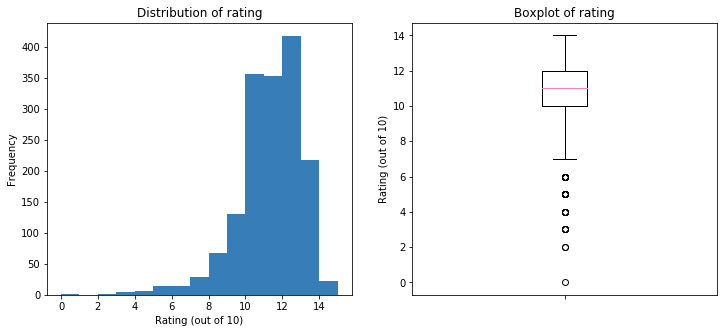

In [98]:
# Plot histogram and boxplot of ratings
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].hist(df_tweet_master.rating_numerator, bins = np.arange(min(df_tweet_master.rating_numerator), (max(df_tweet_master.rating_numerator) + 2), 1))
axs[0].set_xlabel('Rating (out of 10)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of rating')

axs[1].boxplot(df_tweet_master.rating_numerator)
axs[1].set_ylabel('Rating (out of 10)')
axs[1].set_xticklabels('')
axs[1].set_title('Boxplot of rating')

plt.savefig("Figures_report/rating_distribution.jpeg", bbox_inches='tight')

#### Are dog ratings and number of likes correlated?

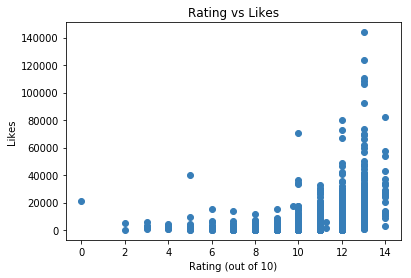

In [99]:
plt.scatter(df_tweet_master['rating_numerator'], df_tweet_master['like_count'])
plt.xlabel('Rating (out of 10)')
plt.ylabel('Likes')
plt.title('Rating vs Likes')

plt.savefig("Figures_report/rating_vs_likes.jpeg", bbox_inches='tight')

####  What is the most common dog breed on WeRateDogs?

In [100]:
# Get number of different dog breeds 
len(df_tweet_master['dog_breed'].value_counts())

113

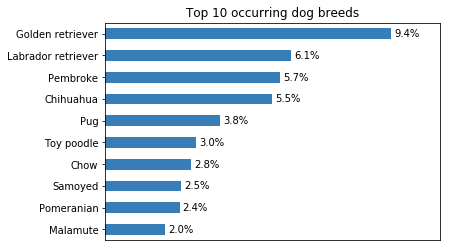

In [101]:
# Find the 10 most occuring dog breeds and place in ascending order
data = (df_tweet_master['dog_breed'].value_counts().nlargest(10)/df_tweet_master['dog_breed'].count())*100
data = data.sort_values(ascending=True)

# Create color palette
base_color = sb.color_palette()[0]

# Plot data
data.plot.barh(color = base_color)

# Print the proportion text on the bars
for i in range (data.shape[0]):
    freq = data[i]
    # Convert into string
    freq_string = '{:0.1f}%'.format(freq)
    # Print the string value on the bar. 
    plt.text(freq+0.1, i, freq_string, va='center')

# Extend the x axis    
plt.xlim(0, 11)

# Remove x axis ticks
plt.xticks([], [])

# Set title
plt.title("Top 10 occurring dog breeds")

plt.savefig("Figures_report/most_common_dogbreeds.jpeg", bbox_inches='tight')

#### Which 10 tweets are the most popular?

In [102]:
# Create popularity column
df_tweet_master['popularity'] = df_tweet_master['like_count']+df_tweet_master['retweet_count']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


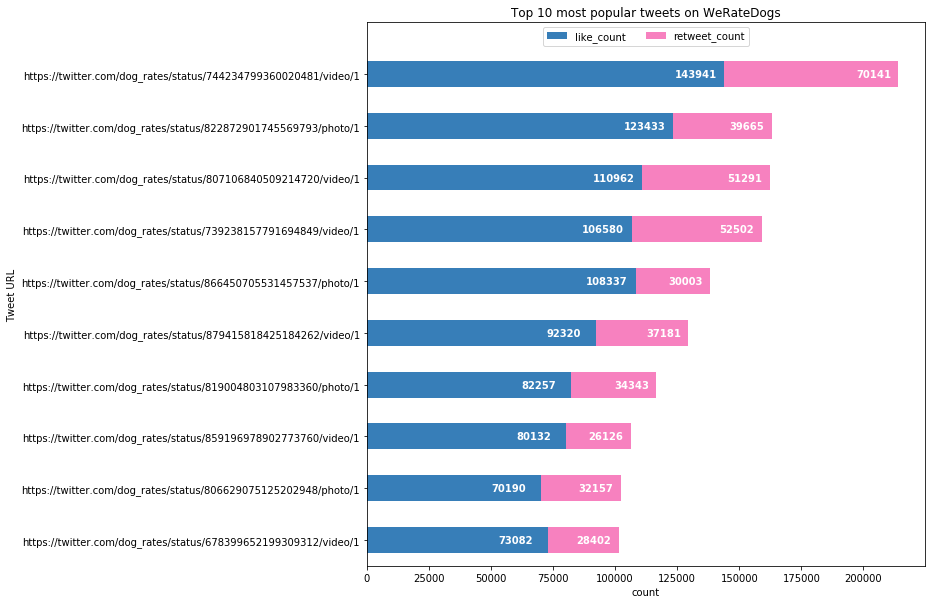

In [103]:
# Find the text, like_count and retweet_count of the 10 most popular tweets and place in ascending order
data = df_tweet_master.sort_values(by=['popularity'], ascending=False)
data = data[['expanded_urls', 'like_count', 'retweet_count', 'popularity']].head(10).sort_values(by='popularity', ascending=True)

# Define bar colors
color = ["#377eb8", "#f781bf"]
colors = sb.set_palette(color)

# Drop popularity column and plot remaining data
data.drop(columns = 'popularity').plot(x='expanded_urls', kind='barh', color=colors, stacked=True, figsize=(10,10)).legend(loc='upper center', ncol=5)

# Print the proportion text on the bars
for i in range (data.shape[0]):
    count_like = data.like_count.iloc[i]
    count_retweet = data.retweet_count.iloc[i]
    # Convert into string
    like_string = '{}'.format(count_like)
    retweet_string = '{}'.format(count_retweet)
    # Print the string value on the bar. 
    plt.text(count_like-20000, i, like_string, va='center', color = '1', weight='bold')
    plt.text(count_retweet+count_like-17000, i, retweet_string, va='center', color = '1', weight='bold')
    

# Set title and labels and extend the y axis limit   
plt.title('Top 10 most popular tweets on WeRateDogs')
plt.ylabel('Tweet URL')
plt.xlabel('count')
plt.ylim(-0.5, 10)

plt.savefig("Figures_report/most_popular_tweets.jpeg", bbox_inches='tight')

In [104]:
# Create list of the image urls of the 10 most popular tweets
like_list = df_tweet_master['popularity'].nlargest(n=10).index.tolist()
url_list = df_tweet_master.loc[like_list, 'jpg_url'].tolist()
url_list

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg',
 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg']

In [105]:
# Create new folder
folder_name = 'Most_Popular_Images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Create empty lists for file names and tweet id
jpeg_list = []
tweet_id_list = []

# Define dataframe
df = df_tweet_master

# Collect images of the 10 most popular tweets and save to folder
for url in url_list:
    url = url
    img_data = requests.get(url).content
    tweet_id = df_image[(df_image['jpg_url']==url)].tweet_id.values[0]
    with open (os.path.join(folder_name) + '/' + str(tweet_id) + '.jpeg', 'wb') as handler:
        handler.write(img_data)
    jpeg_list.append((os.path.join(folder_name) + '/' + str(tweet_id) + '.jpeg'))
    tweet_id_list.append(tweet_id)

In [106]:
def subplot_positions(row,column):
    # Takes the arguments row and column (grid dimensions of pyplot subplots)
    # Returns a list of subplot positions
    list_dim = []
    for x in range(row):
        for y in range(column):
            dim = [x,y]
            list_dim.append(dim)
    return(list_dim)   

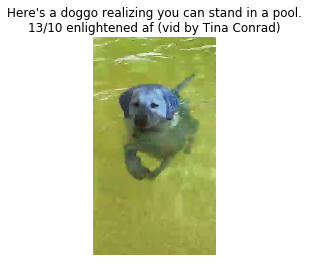

In [107]:
import cv2
from textwrap import wrap

# Read in the image of the most popular tweet 
jpeg = jpeg_list[0]
image = cv2.imread(jpeg)

# Get the corresponding tweet text
title = df_tweet_master[df_tweet_master['tweet_id']==tweet_id_list[0]].text.values[0]

# Plot image and tweet text
plt.imshow(image)
plt.title(("\n".join(wrap(title, 50))))
plt.axis('off')

plt.savefig('Figures_report/most_popular_dog.jpeg', bbox_inches='tight')

In [108]:
# Print dog breed and tweet text of the most popular dog
test = df_tweet_master.sort_values(by=['popularity'], ascending=False)
test = test[['dog_breed', 'text','popularity']].head(1).sort_values(by='popularity', ascending=False)
print(list(test['dog_breed']))
print(list(test['text']))

['Labrador retriever']
["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) "]


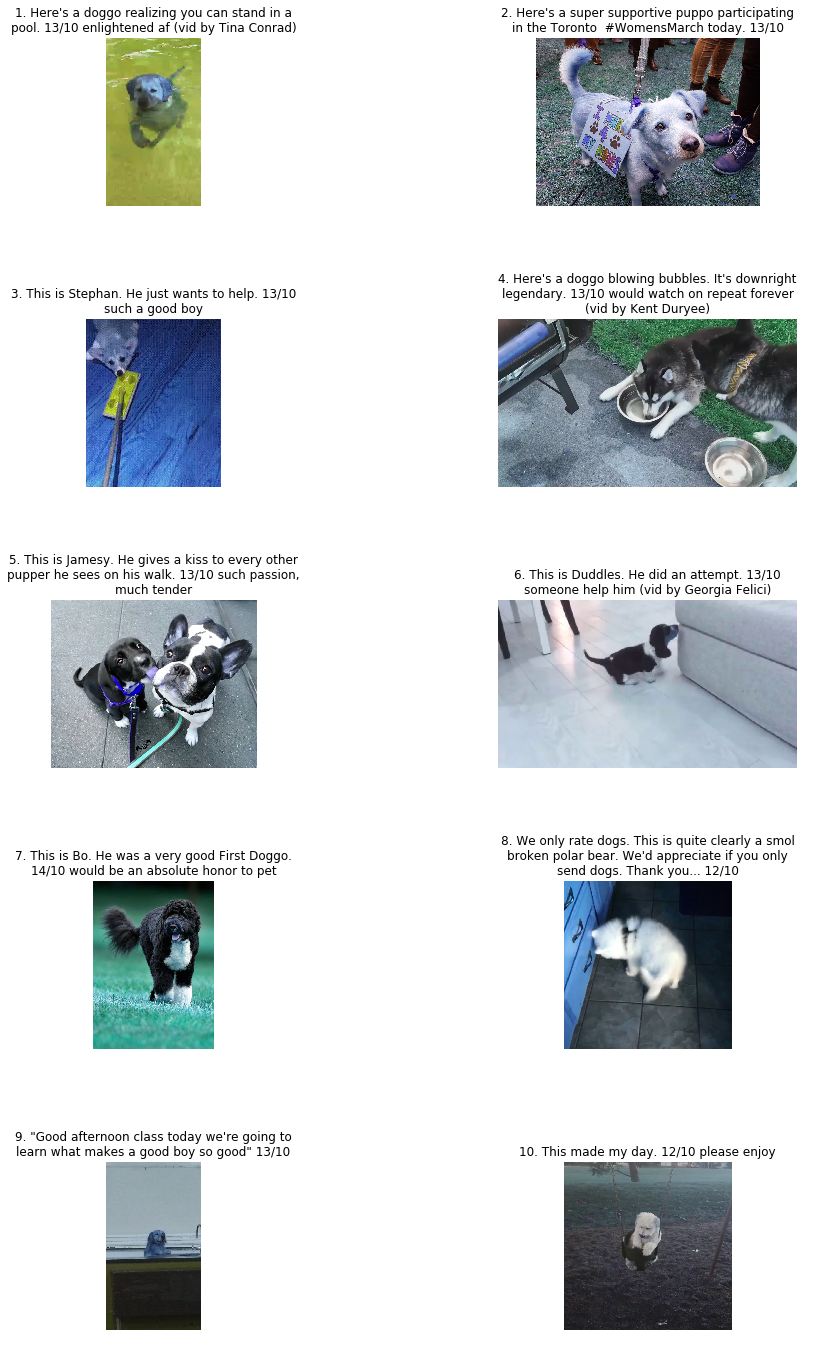

In [109]:
# Plot the 10 most popular dog images
# Define number of rows and columns of the desired subplot grid
row = 5
column = 2

# Create subplot grid
fig, axs = plt.subplots(row,column, figsize=(15, 20)) 

# Create list with subplot positions
list_dim = subplot_positions(row,column)

# Set image number
number = 1

# Loop through file name list (jpeg_list) and plot image + text 
for i in range (len(jpeg_list)):
    jpeg = jpeg_list[i]
    image = cv2.imread(jpeg)
    title = df_tweet_master[df_tweet_master['tweet_id']==tweet_id_list[i]].text.values[0]
    
    # Get subplot position
    dim = list_dim[i]
    x = dim[0]
    y = dim[1]
    
    axs[x, y].imshow(image)
    axs[x, y].set_title(("\n".join(wrap((str(number) + '. ' + title), 50))))
    axs[x, y].axis('off')
    
    number = number+1
    
# Figure layout
fig.tight_layout(pad=5.0)

# Save figure
plt.savefig('Figures_report/most_popular_dogs.jpeg', bbox_inches='tight')

### Insights 


1. 75% of the dogs receive a rating above 10/10, the lowest rating is 0/10, the hihgest rating is 14/10 and the most frequent rating is 12/10.


2. Higher ratings do not necessarily lead to more likes. 


3. There are in total 113 different dog breeds detected, of which the 10 most common: 

|rank|dog breed|
|-----|-----|
|1.|Golden retriever|
|2.|Labrador retriever|
|3.|Pembroke|
|4.|Chihuahua|
|5.|Pug|
|6.|Toy poodle|
|7.|Chow|
|8.|Samoyed|
|9.|Pomeranian|
|10.|Malamute|

4. The top 10 most popular tweets are:

|rank|tweet url|
|-----|-----|
|1.| https://twitter.com/dog_rates/status/744234799360020481/video/1 |
|2.| https://twitter.com/dog_rates/status/822872901745569793/photo/1 |
|3.| https://twitter.com/dog_rates/status/807106840509214720/video/1 |
|4.| https://twitter.com/dog_rates/status/739238157791694849/video/1 |
|5.| https://twitter.com/dog_rates/status/866450705531457537/photo/1 |
|6.| https://twitter.com/dog_rates/status/879415818425184262/video/1 |
|7.| https://twitter.com/dog_rates/status/819004803107983360/photo/1 |
|8.| https://twitter.com/dog_rates/status/859196978902773760/video/1 |
|9.| https://twitter.com/dog_rates/status/806629075125202948/photo/1 |
|10.| https://twitter.com/dog_rates/status/678399652199309312/video/1 | 

In [91]:
%%html
<style>
table {float:left}
<?style>

### Visualization
Images of the top 10 most popular tweets

![most popular dogs](Figures_report/most_popular_dogs.jpeg)